| Feature              | Description                                                                                       |
|--------------------|-------------------------------------------------------------------------------------------------|
| **Size (cm)**      | Fruit size in centimeters, measuring the diameter of the fruit.                                           |
| **Weight (g)**     | Fruit weight in grams, indicating the mass of the fruit.                                                  |
| **Brix (Sweetness)** | Fruit sweetness, measured on the Brix scale (°Bx).                                      |
| **pH (Acidity)**   | Fruit acidity, measured with a pH scale.                                                  |
| **Softness (1-5)** | The softness of the fruit, measured on a scale of 1 to 5 (1: very hard, 5: very soft).    |
| **Harvest Time (days)** | The time taken to harvest the fruit, measured in days.                                |
| **Ripeness (1-5)** | Fruit ripeness, measured on a scale of 1 to 5 (1: not ripe, 5: very ripe).    |
| **Color**          | Fruit skin color, showing color variation.                                                    |
| **Variety**        | Varieties or types of fruit.                                                                       |
| **Blemishes (Y/N)** | Indicates whether the fruit has physical defects or not (Y: Yes, N: No).                    |
| **Quality (1-5)**  | Overall fruit quality assessment, measured on a scale of 1 to 5 (1: low quality, 5: high quality). |


# **1. Import Model**

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , mean_squared_error, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, GRU, Dense, Dropout, Reshape, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperModel
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from keras_tuner.tuners import RandomSearch
import pickle
import warnings
warnings.filterwarnings("ignore")

# **2. Load Dataset**

In [2]:
df = pd.read_csv('Orange Quality Data.csv')

In [3]:
df.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [4]:
df.tail()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0
240,7.3,282,10.5,2.9,4.0,21,2.0,Orange-Red,Jaffa,Y (Minor),4.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Size (cm)           241 non-null    float64
 1   Weight (g)          241 non-null    int64  
 2   Brix (Sweetness)    241 non-null    float64
 3   pH (Acidity)        241 non-null    float64
 4   Softness (1-5)      241 non-null    float64
 5   HarvestTime (days)  241 non-null    int64  
 6   Ripeness (1-5)      241 non-null    float64
 7   Color               241 non-null    object 
 8   Variety             241 non-null    object 
 9   Blemishes (Y/N)     241 non-null    object 
 10  Quality (1-5)       241 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 20.8+ KB


In [6]:
df.shape

(241, 11)

In [7]:
df.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


# **3. Preprocessing Data**

## Data Cleaning

In [8]:
df.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [9]:
df.isna().sum()

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64

In [12]:
df['Blemishes (Y/N)'].value_counts()

Blemishes (Y/N)
N                          149
Y (Sunburn Patch)           23
Y (Scars)                   17
Y (Minor)                   14
Y (Mold Spot)               10
Y (Bruising)                 9
Y (Split Skin)               8
Y (Minor Insect Damage)      6
Y (Sunburn)                  2
Y (Bruise)                   1
N (Minor)                    1
N (Split Skin)               1
Name: count, dtype: int64

In [17]:
# Fungsi untuk mengubah nilai
def simplify_blemishes(value):
    if 'Y' in value:
        return 'Y'
    elif 'N' in value:
        return 'N'
    return value

# Terapkan fungsi ke kolom 'Blemishes (Y/N)' pada df_encoded
df['Blemishes (Y/N)'] = df['Blemishes (Y/N)'].apply(simplify_blemishes)

df['Blemishes (Y/N)'].value_counts()

Blemishes (Y/N)
N    151
Y     90
Name: count, dtype: int64

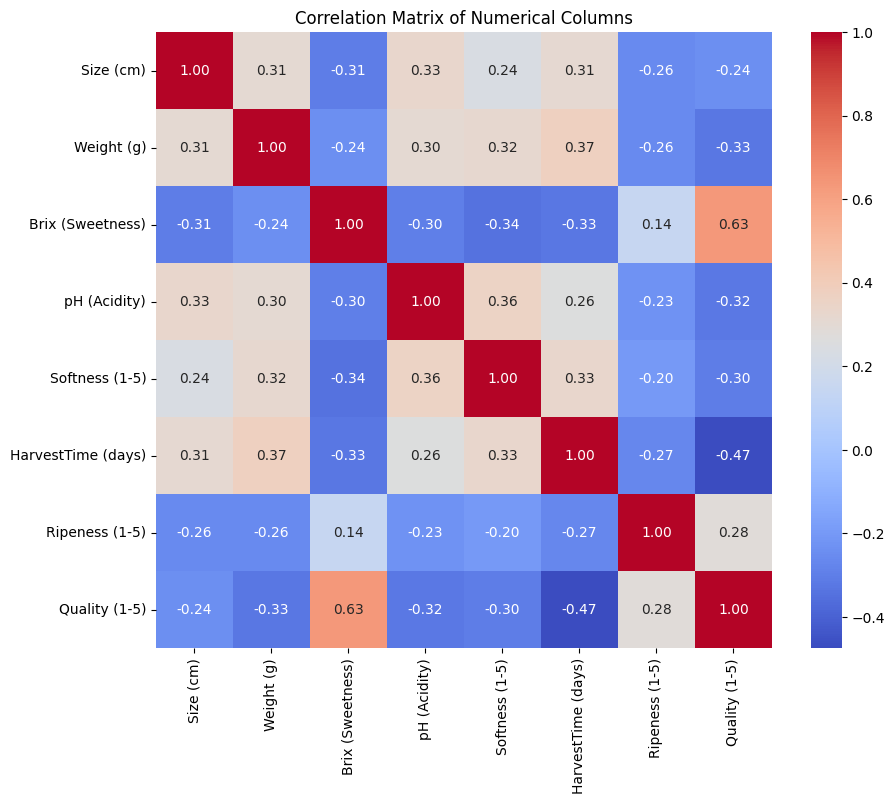

In [18]:
numerical_columns = df.select_dtypes(include='number')
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

**KESIMPULAN :** Pada grafik diatas tidak ada kolom yang memiliki korelasi dengan kolom lainnnya maka tidak ada kolom yang akan dihapus berdasarkan korelasinya.

## Outlier Handling

In [19]:
# Selecting numeric columns that are not of object type
numeric_columns = df.select_dtypes(exclude='object').columns
numeric_columns

Index(['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)',
       'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)',
       'Quality (1-5)'],
      dtype='object')

Skewness of Size (cm): 0.15456311300244854


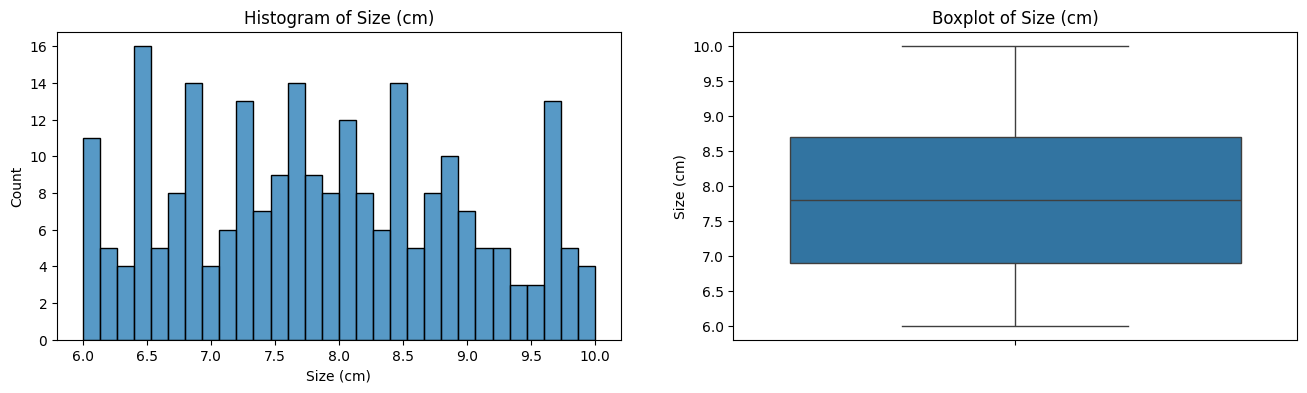

Skewness of Weight (g): -0.048941969729031316


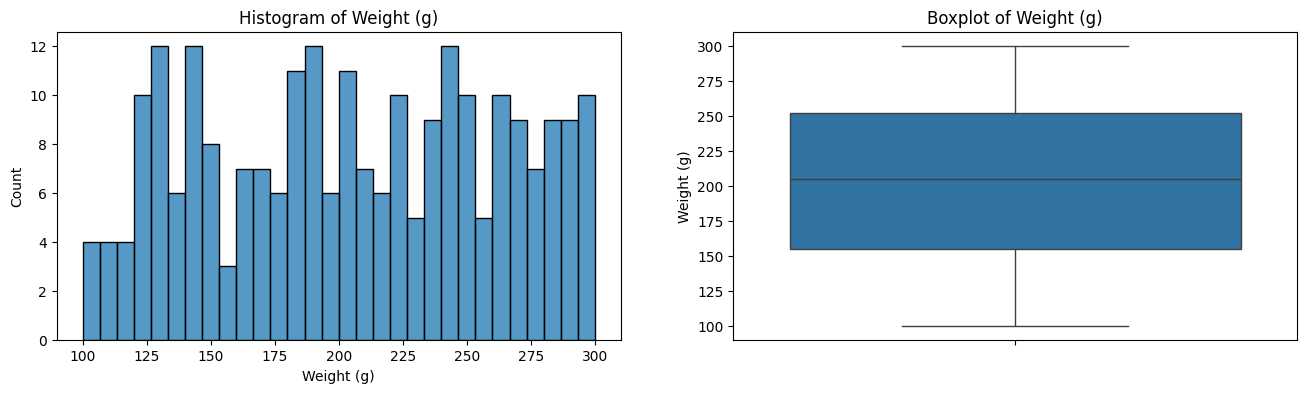

Skewness of Brix (Sweetness): -0.03406710137449985


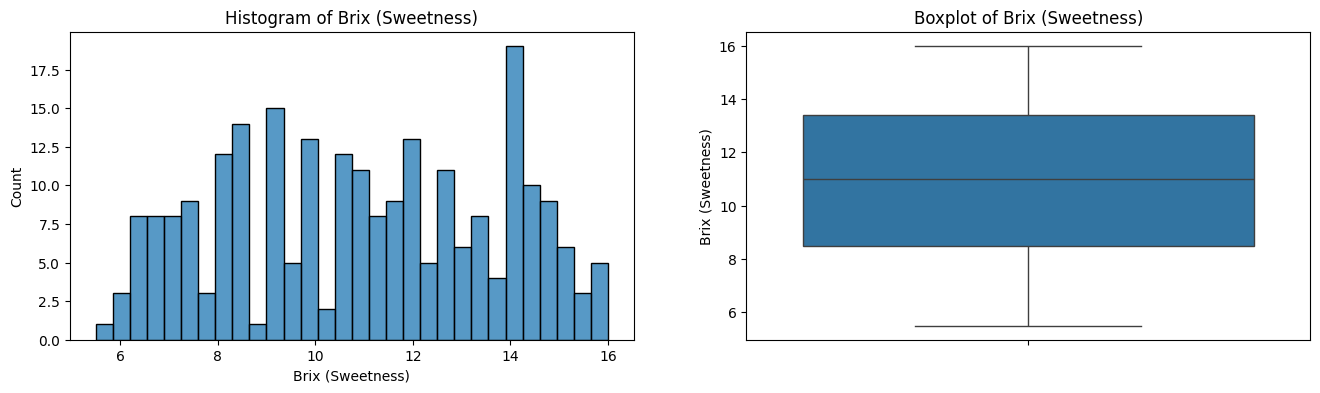

Skewness of pH (Acidity): 0.37927481481253217


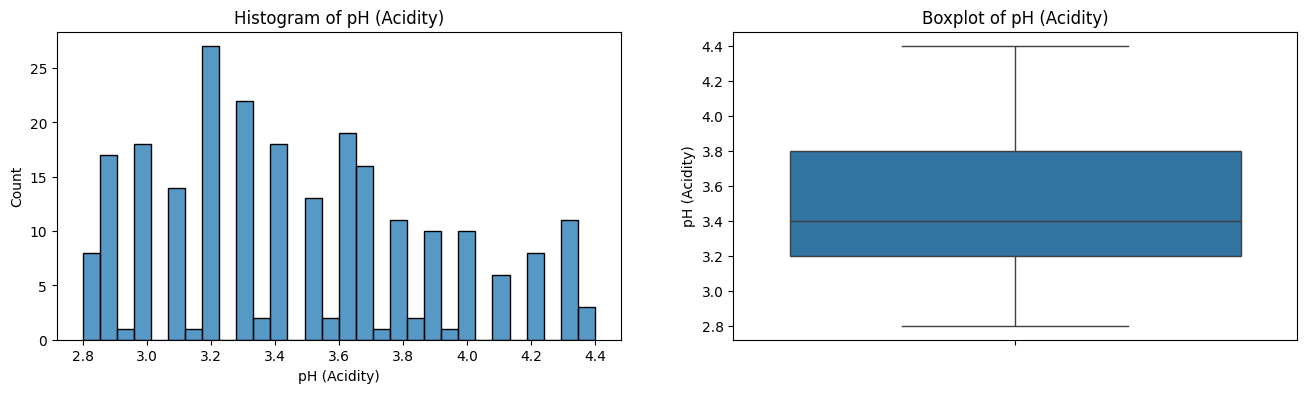

Skewness of Softness (1-5): -0.06715482184658936


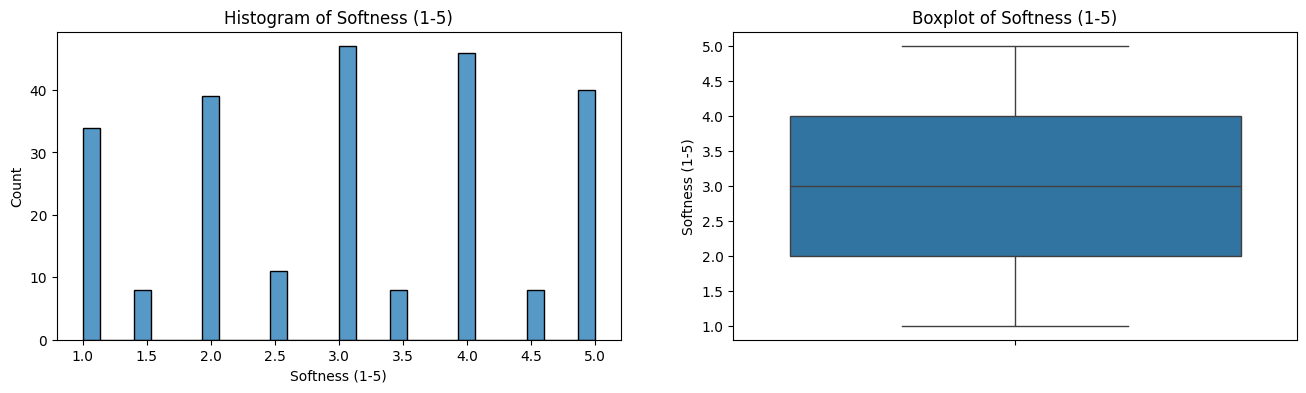

Skewness of HarvestTime (days): -0.04045902298553126


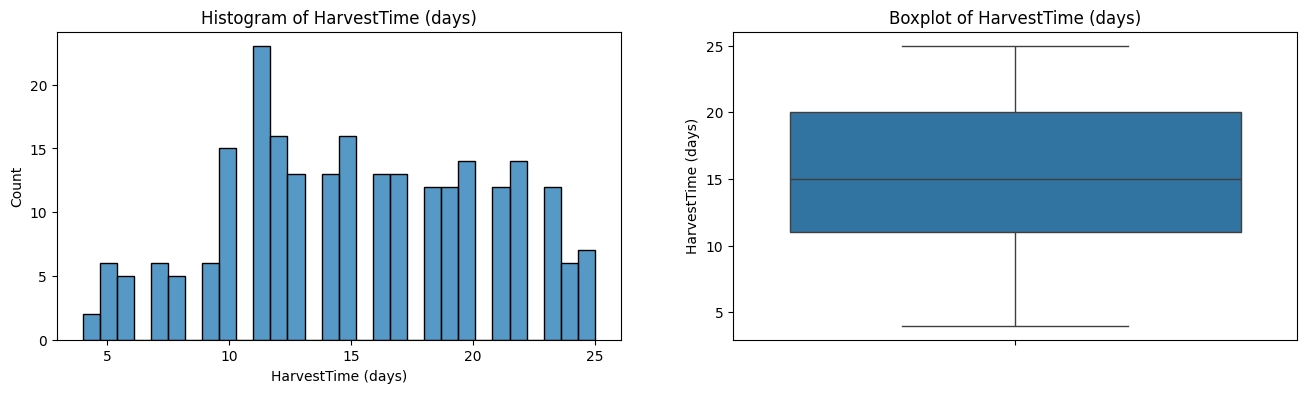

Skewness of Ripeness (1-5): -0.5943341606203865


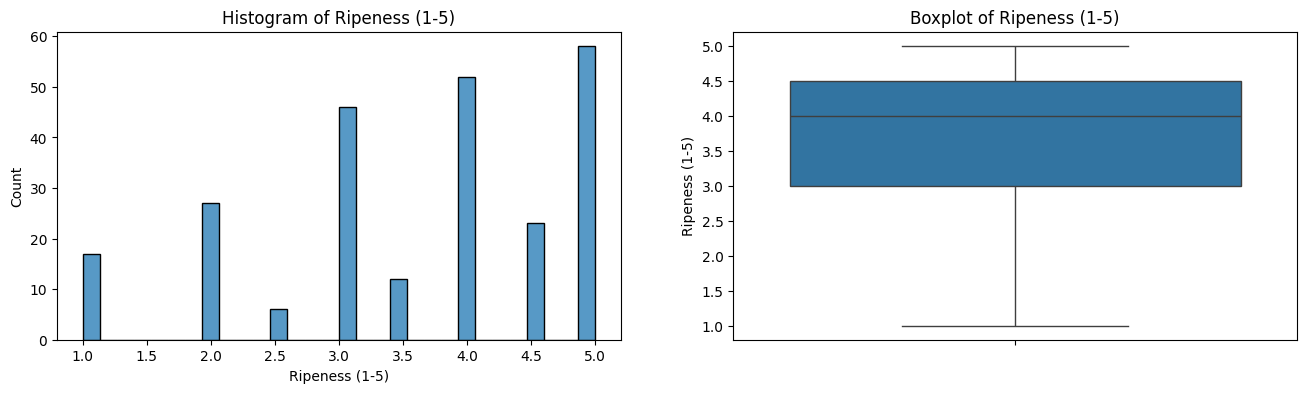

Skewness of Quality (1-5): -0.9338634693931638


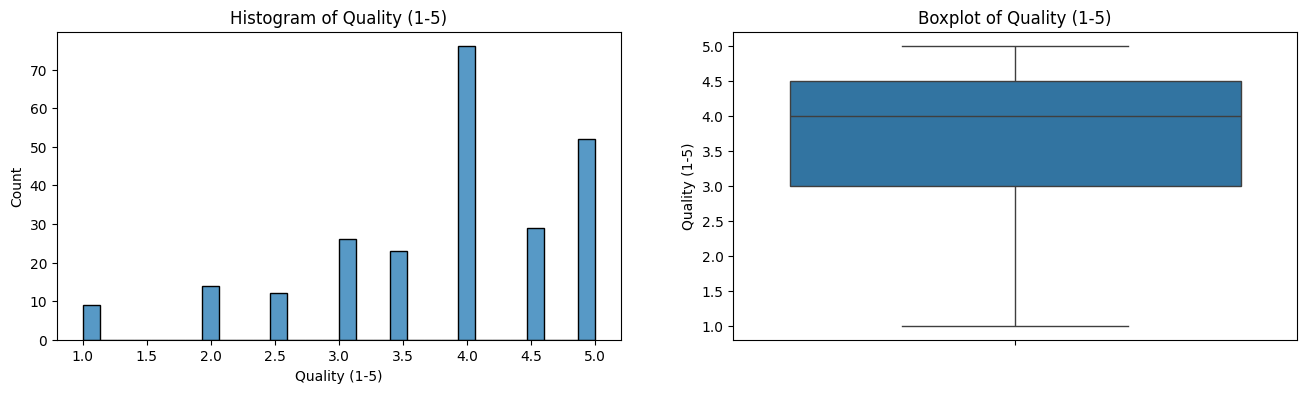

In [20]:
# Calculate skewness and create a distribution diagram
for col in numeric_columns:
    skewness = df[col].skew()
    print(f'Skewness of {col}: {skewness}')

    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30)
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

    plt.show()

**KESIMPULAN :** Dari grafik tersebut dapat dilihat dari kolom numerik tidak ada yang memiliki outlier.

## Feature Engineering

In [21]:
def calculate_density(row):
    radius_cm = row['Size (cm)'] / 2
    volume_cm3 = (4/3) * math.pi * (radius_cm ** 3)
    density = row['Weight (g)'] / volume_cm3
    return density

In [22]:
# Add a Density column to the DataFrame
df['Density (g/cm³)'] = df.apply(calculate_density, axis=1)

In [23]:
df.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5),Density (g/cm³)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0,0.814873
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5,0.762048
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0,0.911100
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5,0.654959
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y,4.5,0.653076


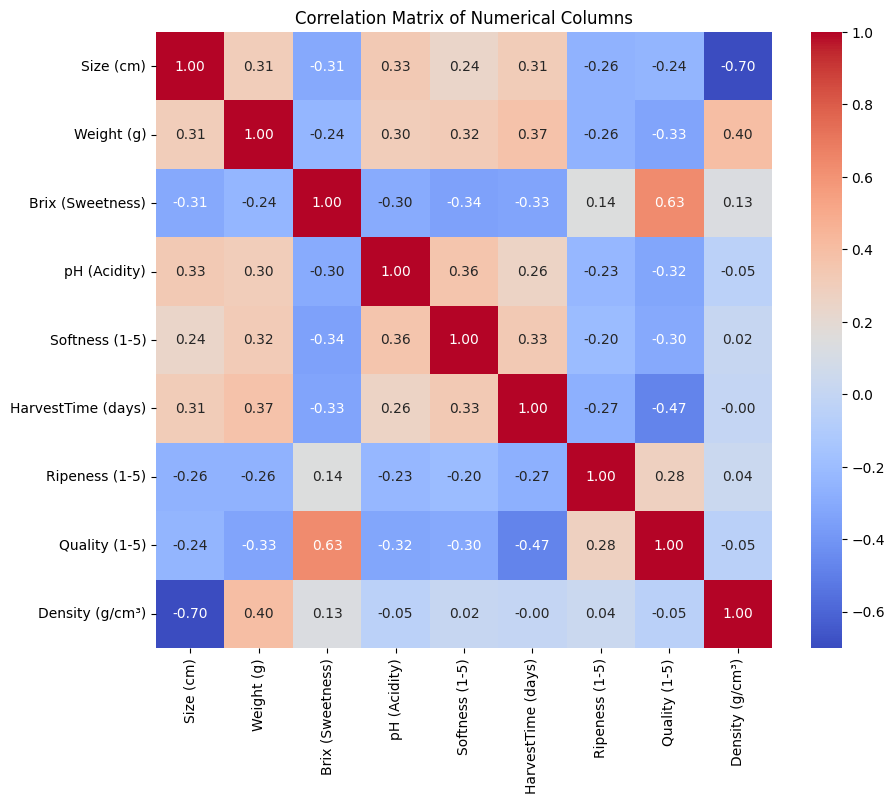

In [24]:
numerical_columns = df.select_dtypes(include='number')
correlation_matrix = numerical_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

**KESIMPULAN :** Dari grafik tersebut dapat dilihat kolom yang baru dibuat `Density (g/cm³)` tidak terdapat korelasi dari kolom yang lain.

## Encoding

In [25]:
df.tail()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5),Density (g/cm³)
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y,5.0,0.723658
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0,1.296101
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y,5.0,0.887306
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y,3.0,1.284333
240,7.3,282,10.5,2.9,4.0,21,2.0,Orange-Red,Jaffa,Y,4.0,1.384465


In [26]:
# Stores the name of a column of type object
object_columns = df.select_dtypes(include='object').columns.tolist()
object_columns

['Color', 'Variety', 'Blemishes (Y/N)']

In [27]:
df[object_columns].nunique()

Color               5
Variety            24
Blemishes (Y/N)     2
dtype: int64

In [28]:
print(df['Color'].value_counts())
print(df['Variety'].value_counts())
print(df['Blemishes (Y/N)'].value_counts())

Color
Deep Orange      75
Light Orange     64
Orange-Red       55
Orange           38
Yellow-Orange     9
Name: count, dtype: int64
Variety
Cara Cara                21
Temple                   18
Star Ruby                18
Navel                    16
Moro (Blood)             16
Tangerine                14
Clementine               14
Washington Navel         14
Satsuma Mandarin         13
Ortanique (Hybrid)       13
Minneola (Hybrid)        12
Jaffa                    11
Ambiance                 11
Valencia                 11
California Valencia       7
Honey Tangerine           7
Hamlin                    5
Midsweet (Hybrid)         5
Clementine (Seedless)     4
Murcott (Hybrid)          3
Navel (Late Season)       3
Blood Orange              2
Navel (Early Season)      2
Tangelo (Hybrid)          1
Name: count, dtype: int64
Blemishes (Y/N)
N    151
Y     90
Name: count, dtype: int64


In [29]:
# Encoding the category column
label_encoder = LabelEncoder()
for col in object_columns:
    df[col] = label_encoder.fit_transform(df[col])
    
df_encoded = df.copy()
df_encoded.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5),Density (g/cm³)
0,7.5,180,12.0,3.2,2.0,10,4.0,2,22,0,4.0,0.814873
1,8.2,220,10.5,3.4,3.0,14,4.5,0,13,0,4.5,0.762048
2,6.8,150,14.0,3.0,1.0,7,5.0,1,3,0,5.0,0.911100
3,9.0,250,8.5,3.8,4.0,21,3.5,3,1,0,3.5,0.654959
4,8.5,210,11.5,3.3,2.5,12,5.0,2,6,1,4.5,0.653076


In [30]:
# See if there are Nan values in the dataset
df_encoded.isnull().sum()

Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
Density (g/cm³)       0
dtype: int64

## Normalization

In [31]:
df['Quality (1-5)'].value_counts()

Quality (1-5)
4.0    76
5.0    52
4.5    29
3.0    26
3.5    23
2.0    14
2.5    12
1.0     9
Name: count, dtype: int64

In [64]:
# define the feature matrix X and the target variable y
fiture = df_encoded.drop(columns=['Quality (1-5)', 'Variety'])
target = df_encoded['Quality (1-5)']

In [65]:
fiture.columns

Index(['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)',
       'Softness (1-5)', 'HarvestTime (days)', 'Ripeness (1-5)', 'Color',
       'Blemishes (Y/N)', 'Density (g/cm³)'],
      dtype='object')

In [66]:
# Mendefinisikan kolom untuk scaling
columns_to_scale = ['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)',
        'HarvestTime (days)', 'Density (g/cm³)']

# Memisahkan kolom 'Location'
Blemishes_column = fiture['Blemishes (Y/N)']
Softness_column = fiture['Softness (1-5)']
Ripeness_column = fiture['Ripeness (1-5)']
Color_column = fiture['Color']
fiture = fiture.drop(['Blemishes (Y/N)', 'Softness (1-5)', 'Ripeness (1-5)','Color'], axis=1)

In [67]:
# Initialize the Robust Scaler
fiture_scalar = StandardScaler()

# Train Scale the Data
fiture_scalar.fit(fiture)

# Melakukan scaling pada kolom-kolom yang ditentukan
features_scaled = fiture_scalar.transform(fiture)

# Membuat DataFrame hasil scaling
features_scaled = pd.DataFrame(features_scaled, columns=columns_to_scale)

# Menambahkan kembali kolom 'Location'
features_scaled['Blemishes (Y/N)'] = Blemishes_column.values

# Menambahkan kembali kolom 'Location'
features_scaled['Softness (1-5)'] = Softness_column.values

# Menambahkan kembali kolom 'Location'
features_scaled['Ripeness (1-5)'] = Ripeness_column.values

# Menambahkan kembali kolom 'Location'
features_scaled['Color'] = Color_column.values

# Menampilkan 1 baris features_scaled
features_scaled.sample()


,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),HarvestTime (days),Density (g/cm³),Blemishes (Y/N),Softness (1-5),Ripeness (1-5),Color
30,0.420012,0.26394,0.033439,-0.413918,-0.064824,-0.357669,0,3.0,4.0,2


In [68]:
target.value_counts()

Quality (1-5)
4.0    76
5.0    52
4.5    29
3.0    26
3.5    23
2.0    14
2.5    12
1.0     9
Name: count, dtype: int64

In [69]:
thresholds = [1, 2, 3, 4, 5]
target_discrete = np.digitize(target, bins=thresholds)

# Kurangi 1 untuk membuat kelas dimulai dari 0
target_discrete -= 1

# Convert target_discrete back to pandas Series
target_discrete = pd.Series(target_discrete)

In [70]:
target_discrete.value_counts()

3    105
4     52
2     49
1     26
0      9
Name: count, dtype: int64

## Split Data

In [71]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_discrete, test_size=0.2, random_state=42)

# **4. Modeling dan Evaluasi**

## Random Forest

In [75]:
model_rf = RandomForestClassifier(max_depth= None, max_features= 'log2', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 5)
model_rf.fit(X_train, y_train)

rf_train_preds = model_rf.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_preds)

rf_test_preds = model_rf.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_test_preds)
mse=mse = mean_squared_error(y_test, rf_test_preds)** 0.5

print("Random Forest Accuracy Train:", rf_train_accuracy)
print("Random Forest Accuracy Test:", rf_test_accuracy)
print("MSE:", mse)
print(classification_report(y_test, rf_test_preds))

Random Forest Accuracy Train: 0.9427083333333334
Random Forest Accuracy Test: 0.5918367346938775
MSE: 0.9258200997725514
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.67      0.40      0.50         5
           2       0.56      0.50      0.53        10
           3       0.60      0.71      0.65        21
           4       0.70      0.54      0.61        13

    accuracy                           0.59        49
   macro avg       0.50      0.43      0.46        49
weighted avg       0.62      0.59      0.60        49



In [76]:
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for RF:", grid_search_rf.best_params_)
print("Best score for RF:", grid_search_rf.best_score_)

Best parameters for RF: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best score for RF: 0.676923076923077


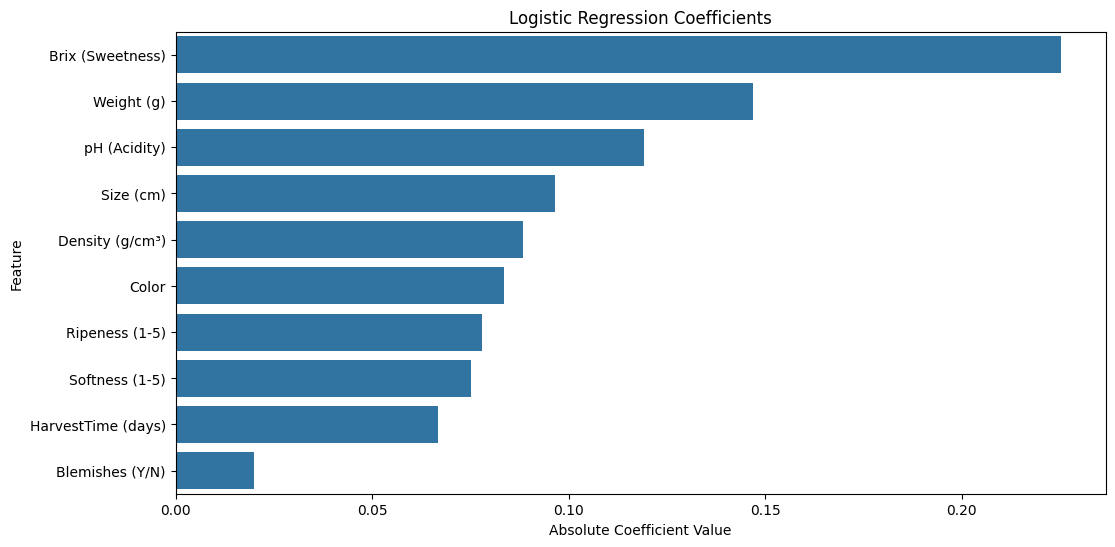

In [94]:
# Membuat DataFrame untuk menyimpan koefisien dan nama fitur
coef_df = pd.DataFrame({'Feature': fiture.columns, 'Coefficient': model_rf.feature_importances_})

# Mengurutkan DataFrame berdasarkan nilai koefisien secara menurun
coef_df_sorted = coef_df.sort_values(by='Coefficient', ascending=False)

# Plot koefisien yang telah diurutkan
plt.figure(figsize=(12, 6))
sns.barplot(x=coef_df_sorted['Coefficient'], y=coef_df_sorted['Feature'])
plt.title('Logistic Regression Coefficients')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

## SVM

In [161]:
# Membuat model model machine learning
model_svm = SVC(kernel='rbf', C=10, gamma=0.1, random_state=42)
model_svm.fit(X_train, y_train)

svm_train_preds = model_svm.predict(X_train)
svm_train_accuracy = accuracy_score(y_train, svm_train_preds)

svm_test_preds = model_svm.predict(X_test)
svm_test_accuracy = accuracy_score(y_test, svm_test_preds)

mse=mse = mean_squared_error(y_test, svm_test_preds)** 0.5

print("SVM Accuracy Train:", svm_train_accuracy)
print("SVM Accuracy Test:", svm_test_accuracy)
print("MSE:", mse)
print(classification_report(y_test, svm_test_preds))

SVM Accuracy Train: 0.9791666666666666
SVM Accuracy Test: 0.6326530612244898
MSE: 0.8451542547285166
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.67      0.40      0.50         5
           2       0.43      0.30      0.35        10
           3       0.71      0.81      0.76        21
           4       0.82      0.69      0.75        13

    accuracy                           0.63        49
   macro avg       0.52      0.44      0.47        49
weighted avg       0.68      0.63      0.65        49



In [96]:
# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid', 'poly']  # Linear or Radial Basis Function kernel
}

# Initialize SVC
svm = SVC()

# Initialize GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search_svm.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best score for SVM:", grid_search_svm.best_score_)

Best parameters for SVM: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best score for SVM: 0.6504723346828609


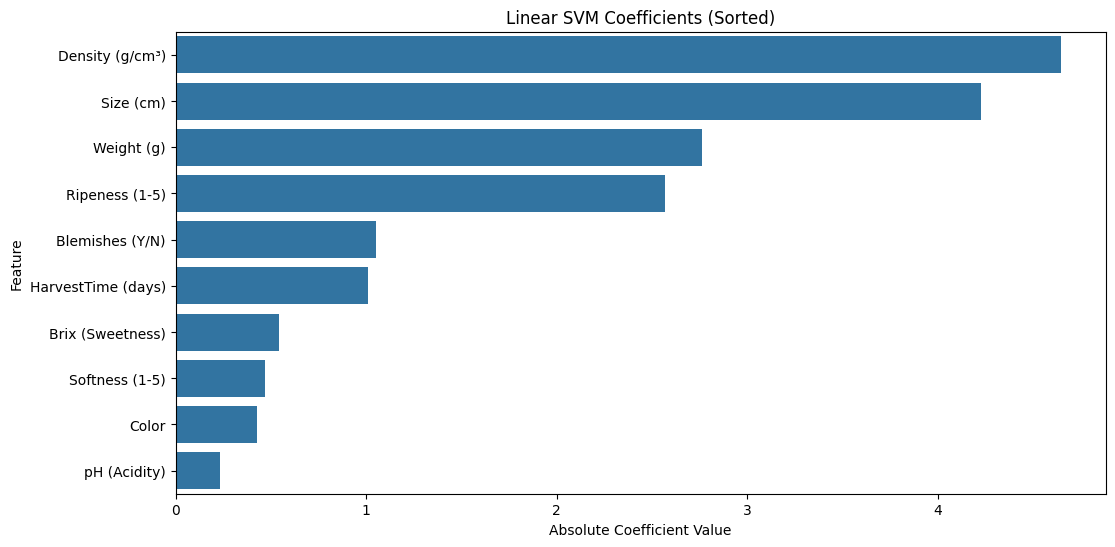

In [97]:
# Membuat DataFrame untuk menyimpan koefisien dan nama fitur
coef_df = pd.DataFrame({'Feature': fiture.columns, 'Coefficient': abs(model_svm.coef_[0])})

# Mengurutkan DataFrame berdasarkan nilai koefisien secara menurun
coef_df_sorted = coef_df.sort_values(by='Coefficient', ascending=False)

# Plot koefisien yang telah diurutkan
plt.figure(figsize=(12, 6))
sns.barplot(x=coef_df_sorted['Coefficient'], y=coef_df_sorted['Feature'])
plt.title('Linear SVM Coefficients (Sorted)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

## Logistic Regression

In [162]:
model_logic = LogisticRegression(random_state=42, C=10, penalty='l1', solver='saga')
model_logic.fit(X_train, y_train)

lr_train_preds = model_logic.predict(X_train)
lr_train_accuracy = accuracy_score(y_train, lr_train_preds)

lr_test_preds = model_logic.predict(X_test)
lr_test_accuracy = accuracy_score(y_test, lr_test_preds)
mse=mse = mean_squared_error(y_test, lr_test_preds)** 0.5

print("Logistic Regression Accuracy Train:", lr_train_accuracy)
print("Logistic Regression Accuracy Test:", lr_test_accuracy)
print("MSE:", mse)
print(classification_report(y_test, lr_test_preds))

Logistic Regression Accuracy Train: 0.703125
Logistic Regression Accuracy Test: 0.6326530612244898
MSE: 0.8206518066482897
              precision    recall  f1-score   support

           1       0.43      0.60      0.50         5
           2       0.44      0.40      0.42        10
           3       0.67      0.76      0.71        21
           4       0.89      0.62      0.73        13

    accuracy                           0.63        49
   macro avg       0.61      0.59      0.59        49
weighted avg       0.66      0.63      0.63        49



In [99]:
# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # L1 for Lasso, L2 for Ridge
    'solver': ['liblinear', 'saga']  # solvers compatible with l1
}

# Initialize Logistic Regression
lr = LogisticRegression()

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search_lr.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for LR:", grid_search_lr.best_params_)
print("Best score for LR:", grid_search_lr.best_score_)

Best parameters for LR: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best score for LR: 0.6403508771929826


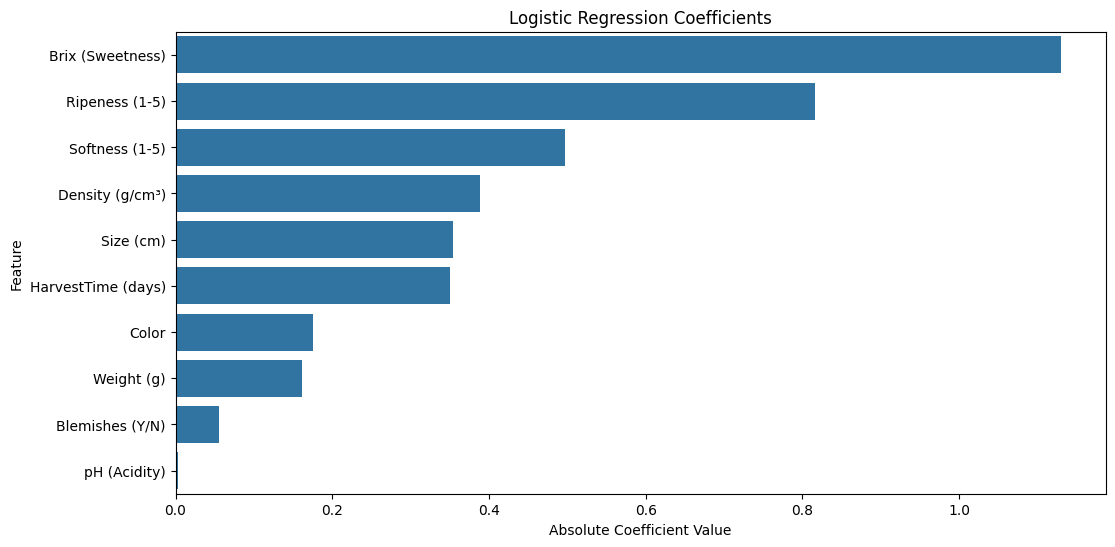

In [100]:
# Membuat DataFrame untuk menyimpan koefisien dan nama fitur
coef_df = pd.DataFrame({'Feature': fiture.columns, 'Coefficient': abs(model_logic.coef_[0])})

# Mengurutkan DataFrame berdasarkan nilai koefisien secara menurun
coef_df_sorted = coef_df.sort_values(by='Coefficient', ascending=False)

# Plot koefisien yang telah diurutkan
plt.figure(figsize=(12, 6))
sns.barplot(x=coef_df_sorted['Coefficient'], y=coef_df_sorted['Feature'])
plt.title('Logistic Regression Coefficients')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

## Neural Network

In [166]:
# Membangun model neural network
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax'))  # 5 output untuk kelas 1, 2, 3, 4, 5

# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Melatih model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy}")

Epoch 1/100
6/6 [==============================] - 1s 55ms/step - loss: 2.0281 - accuracy: 0.2656 - val_loss: 1.8044 - val_accuracy: 0.3061
Epoch 2/100
6/6 [==============================] - 0s 15ms/step - loss: 1.6848 - accuracy: 0.3750 - val_loss: 1.6493 - val_accuracy: 0.3673
Epoch 3/100
6/6 [==============================] - 0s 16ms/step - loss: 1.3811 - accuracy: 0.4635 - val_loss: 1.5555 - val_accuracy: 0.3673
Epoch 4/100
6/6 [==============================] - 0s 19ms/step - loss: 1.2866 - accuracy: 0.5104 - val_loss: 1.4756 - val_accuracy: 0.3265
Epoch 5/100
6/6 [==============================] - 0s 14ms/step - loss: 1.2467 - accuracy: 0.4948 - val_loss: 1.4199 - val_accuracy: 0.4490
Epoch 6/100
6/6 [==============================] - 0s 15ms/step - loss: 1.1693 - accuracy: 0.5625 - val_loss: 1.3642 - val_accuracy: 0.4694
Epoch 7/100
6/6 [==============================] - 0s 20ms/step - loss: 1.0905 - accuracy: 0.6146 - val_loss: 1.3247 - val_accuracy: 0.5714
Epoch 8/100
6/6 [===

## CNN & LSTM

In [174]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target_discrete, test_size=0.2, random_state=42)

# Change the shape of the feature to match the CNN input
X_train_reshape = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshape = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build model CNN-LSTM
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_reshape.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Reshape((-1, 64)))  # Ubah bentuk untuk input ke LSTM dengan mempertahankan dimensi yang sesuai
model.add(GRU(150, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(GRU(100, activation='relu', return_sequences=False))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax'))

# compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train_reshape, y_train, validation_data=(X_test_reshape, y_test), epochs=75, batch_size=32)


Epoch 1/75
6/6 [==============================] - 3s 148ms/step - loss: 1.7629 - accuracy: 0.2917 - val_loss: 1.5524 - val_accuracy: 0.4286
Epoch 2/75
6/6 [==============================] - 0s 42ms/step - loss: 1.7505 - accuracy: 0.2396 - val_loss: 1.5420 - val_accuracy: 0.4286
Epoch 3/75
6/6 [==============================] - 0s 42ms/step - loss: 1.6874 - accuracy: 0.2760 - val_loss: 1.5267 - val_accuracy: 0.4286
Epoch 4/75
6/6 [==============================] - 0s 44ms/step - loss: 1.5838 - accuracy: 0.3646 - val_loss: 1.5092 - val_accuracy: 0.4286
Epoch 5/75
6/6 [==============================] - 0s 41ms/step - loss: 1.5983 - accuracy: 0.3281 - val_loss: 1.4913 - val_accuracy: 0.4286
Epoch 6/75
6/6 [==============================] - 0s 38ms/step - loss: 1.4180 - accuracy: 0.4219 - val_loss: 1.4754 - val_accuracy: 0.4286
Epoch 7/75
6/6 [==============================] - 0s 39ms/step - loss: 1.4137 - accuracy: 0.4531 - val_loss: 1.4591 - val_accuracy: 0.4286
Epoch 8/75
6/6 [==========

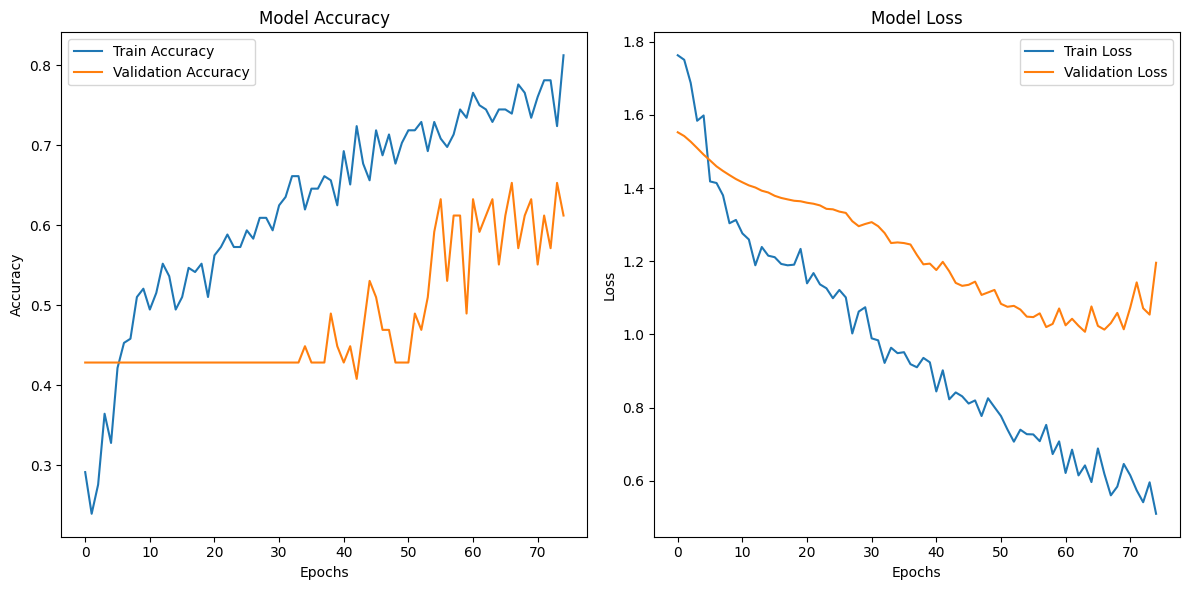

In [175]:
# Plot accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(model.history.history['accuracy'], label='Train Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(model.history.history['loss'], label='Train Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [203]:
class MyHyperModel(HyperModel):
    def __init__(self, num_classes):
        self.num_classes = num_classes

    def build(self, hp):
        model = Sequential()
        model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_reshape.shape[1], 1)))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
        model.add(Reshape((-1, 64)))  # Reshape untuk input ke GRU
        
        # GRU layer dengan hyperparameter tuning
        model.add(LSTM(hp.Int('lstm_units1', min_value=50, max_value=100, step=25),
                      activation='relu',
                      return_sequences=True))
        model.add(Dropout(hp.Float('dropout1', min_value=0.2, max_value=0.5, step=0.1)))
        
        model.add(LSTM(hp.Int('lstm_units2', min_value=25, max_value=50, step=25),
                      activation='relu',
                      return_sequences=False))
        model.add(Dropout(hp.Float('dropout2', min_value=0.2, max_value=0.5, step=0.1)))
        
        model.add(BatchNormalization())
        model.add(Dense(self.num_classes, activation='softmax'))

        model.compile(
            optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[0.001, 0.01, 0.1])),
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
        )
        return model

# Callbacks
tensorboard_callback = TensorBoard(log_dir='log_dir_LSTM/modelHP')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Hyperparameter tuning with RandomSearch
hypermodel = MyHyperModel(num_classes=5)
tuner = RandomSearch(hypermodel,
                     objective='val_accuracy',
                     max_trials=15,
                     directory='my_dir_LSTM',
                     project_name='cnnHyperParameter')


In [204]:
# Start the hyperparameter search
tuner.search(X_train_reshape, y_train,
             epochs=100,
             validation_data=(X_test_reshape, y_test),
             callbacks=[tensorboard_callback, early_stop],
             batch_size=32)

Trial 15 Complete [00h 00m 08s]
val_accuracy: 0.4897959232330322

Best val_accuracy So Far: 0.6530612111091614
Total elapsed time: 00h 03m 03s


In [46]:
# To get the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

In [47]:
# Menampilkan hyperparameter terbaik
print("Best hyperparameters:")
print(f"GRU Units 1: {best_hyperparameters.get('gru_units1')}")
print(f"Dropout 1: {best_hyperparameters.get('dropout1')}")
print(f"GRU Units 2: {best_hyperparameters.get('gru_units2')}")
print(f"Dropout 2: {best_hyperparameters.get('dropout2')}")
print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")


Best hyperparameters:
GRU Units 1: 100
Dropout 1: 0.4
GRU Units 2: 25
Dropout 2: 0.4
Learning Rate: 0.001


In [48]:
# Melihat ringkasan hasil dari setiap trial
tuner.results_summary()

Results summary
Results in my_dir\cnnHyperParameter
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 05 summary
Hyperparameters:
gru_units1: 100
dropout1: 0.4
gru_units2: 25
dropout2: 0.4
learning_rate: 0.001
Score: 0.6938775777816772

Trial 02 summary
Hyperparameters:
gru_units1: 50
dropout1: 0.30000000000000004
gru_units2: 25
dropout2: 0.4
learning_rate: 0.01
Score: 0.6734693646430969

Trial 14 summary
Hyperparameters:
gru_units1: 50
dropout1: 0.2
gru_units2: 50
dropout2: 0.2
learning_rate: 0.01
Score: 0.6734693646430969

Trial 13 summary
Hyperparameters:
gru_units1: 100
dropout1: 0.30000000000000004
gru_units2: 25
dropout2: 0.4
learning_rate: 0.01
Score: 0.6734693646430969

Trial 08 summary
Hyperparameters:
gru_units1: 75
dropout1: 0.2
gru_units2: 25
dropout2: 0.30000000000000004
learning_rate: 0.01
Score: 0.6326530575752258

Trial 11 summary
Hyperparameters:
gru_units1: 50
dropout1: 0.30000000000000004
gru_units2: 50
dropout2: 0.4
learning_rate: 0.001
S

# **5. Model Inference**

In [180]:
features_scaled.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),HarvestTime (days),Density (g/cm³),Blemishes (Y/N),Softness (1-5),Ripeness (1-5),Color
0,-0.318168,-0.445988,0.396454,-0.651937,-1.005949,-0.157821,0,2.0,4.0,2
1,0.327740,0.263940,-0.148068,-0.175898,-0.253049,-0.289720,0,3.0,4.5,0
2,-0.964075,-0.978434,1.122482,-1.127977,-1.570623,0.082447,0,1.0,5.0,1
3,1.065920,0.796386,-0.874096,0.776182,1.064525,-0.557113,0,4.0,3.5,3
4,0.604557,0.086458,0.214947,-0.413918,-0.629499,-0.561813,1,2.5,5.0,2


In [78]:
# Load the machine learning models and scalers from the saved files
model_rf = pickle.load(open('model_rf.pkl', 'rb'))
fiture_scalar = pickle.load(open('feature_scalar.pkl', 'rb'))

In [79]:
features_scaled['Ripeness (1-5)'].value_counts()

Ripeness (1-5)
5.0    58
4.0    52
3.0    46
2.0    27
4.5    23
1.0    17
3.5    12
2.5     6
Name: count, dtype: int64

In [80]:
print(df['Density (g/cm³)'].min())
print(df['Density (g/cm³)'].max())

0.22600077601407778
2.3475566213545


In [87]:
# Membuat DataFrame dengan 10 baris data
data = {
    'Size (cm)': np.random.uniform(6, 10, 10).round(1),
    'Weight (g)': np.random.randint(100, 300, 10),
    'Brix (Sweetness)': np.random.uniform(5, 16, 10).round(1),
    'pH (Acidity)': np.random.uniform(2, 5, 10).round(1),
    'Softness (1-5)': np.random.uniform(1, 5, 10).round(1),
    'HarvestTime (days)': np.random.randint(4, 25, 10),
    'Ripeness (1-5)': np.random.uniform(1, 5, 10).round(1),
    'Color': np.random.randint(0, 4, 10),
    'Blemishes (Y/N)': np.random.choice([1, 0], 10),
}

df_new_data = pd.DataFrame(data)
df_new_data.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Blemishes (Y/N)
0,8.9,283,5.6,3.5,4.2,13,4.2,2,1
1,6.2,161,13.3,2.9,4.3,5,3.6,1,1
2,9.6,225,8.5,2.4,2.9,18,1.7,3,0
3,10.0,271,16.0,4.0,2.8,6,3.8,1,1
4,8.8,275,7.8,3.4,2.0,15,2.2,0,0


In [88]:
# Menghitung densitas (Density = Weight / (Size^3))
df_new_data['Density (g/cm³)'] = df_new_data['Weight (g)'] / (df_new_data['Size (cm)'] ** 3)
df_new_data.head()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Blemishes (Y/N),Density (g/cm³)
0,8.9,283,5.6,3.5,4.2,13,4.2,2,1,0.401436
1,6.2,161,13.3,2.9,4.3,5,3.6,1,1,0.675540
2,9.6,225,8.5,2.4,2.9,18,1.7,3,0,0.254313
3,10.0,271,16.0,4.0,2.8,6,3.8,1,1,0.271000
4,8.8,275,7.8,3.4,2.0,15,2.2,0,0,0.403538


In [89]:
# Mendefinisikan kolom untuk scaling
columns_to_scale = ['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)',
        'HarvestTime (days)', 'Density (g/cm³)']

# Memisahkan kolom 'Location'
Blemishes_column = df_new_data['Blemishes (Y/N)']
Softness_column = df_new_data['Softness (1-5)']
Ripeness_column = df_new_data['Ripeness (1-5)']
Color_column = df_new_data['Color']
df_new_data = df_new_data.drop(['Blemishes (Y/N)', 'Softness (1-5)', 'Ripeness (1-5)','Color'], axis=1)

In [90]:
# Melakukan scaling pada kolom-kolom yang ditentukan
new_features_scaled = fiture_scalar.transform(df_new_data)

# Membuat DataFrame hasil scaling
new_features_scaled = pd.DataFrame(new_features_scaled, columns=columns_to_scale)

# Menambahkan kembali kolom 'Location'
new_features_scaled['Blemishes (Y/N)'] = Blemishes_column.values

# Menambahkan kembali kolom 'Location'
new_features_scaled['Softness (1-5)'] = Softness_column.values

# Menambahkan kembali kolom 'Location'
new_features_scaled['Ripeness (1-5)'] = Ripeness_column.values

# Menambahkan kembali kolom 'Location'
new_features_scaled['Color'] = Color_column.values

# Menampilkan 1 baris features_scaled
new_features_scaled.sample()


,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),HarvestTime (days),Density (g/cm³),Blemishes (Y/N),Softness (1-5),Ripeness (1-5),Color
5,1.8041,-0.073276,0.287549,1.966281,1.440974,-1.659245,1,4.3,2.7,3


In [91]:
# Melakukan prediksi pada fiture baru menggunakan balace logistic regression
predict_new_fiture = model_rf.predict(new_features_scaled)

# Melihat hasil dari fiture baru
predict_new_fiture

array([2, 3, 1, 3, 0, 3, 2, 1, 3, 1], dtype=int64)

In [92]:
predict_new_fiture += 1
predict_new_fiture

array([3, 4, 2, 4, 1, 4, 3, 2, 4, 2], dtype=int64)

# **6. Export Model**

In [176]:
#save new machine learning model
with open('model_rf.pkl', 'wb') as model_file:
    pickle.dump(model_rf, model_file)

#save Robust Scalar model
with open('feature_scalar.pkl', 'wb') as model_file:
    pickle.dump(fiture_scalar, model_file)